In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
import pandas as pd
import sympy,scipy
from fractions import Fraction

$$
\newcommand{\gap}{\hspace{.25cm}}
\newcommand{\gmath}{\hspace{.25cm}\displaystyle}
$$

# Intro to Probability Theory

What is probability? 

**Probability** is a type of mathematics for describing the odds of different outcomes.

**Probability theory** tells us how to apply different probabilistic models to real-world situations.

Consider flipping a fair coin. Typicallly, we expect the coin will land heads half of the time and tails half of the time.

Meanwhile, physicists completely understand the physics behind flipping a coin and, with enough resources, we could design a coin-flipping device that produces any desired coin-flip outcome every time.

But such a device is impractical and so we instead <i>model</i> coin flips as random events with outcomes determined by probabilities.

Efforts to predict the weather are similar. Meterologists understand the phyiscs governing the weather, but computational constraints limit our ability to predict weather too far in advance. This leads to probability-based weather predictions; for example, "there is a 30% chance of rain today"

The ***probability*** of an outcome is a number between 0 and 1 with larger numbers indicating more likely outcomes.

Usually, we are considering a complete set of all possible outcomes from some event and comparing the probability of each outcome.

For example, the event of flipping a coin has two possible outcomes $C=\{H,T\}$ where denote the probability of getting heads as $p(C=H)$ or, if context is clear, then simply $p(H)$.

No other outcomes are possible for this event, and so, it must be the $p(H)+p(T)=1$

If $p(H)+p(T)<1$, then there is some probability of an outcome from the coin flip besides $C=H$ or $C=T$. 

Thus, if $C=H$ and $C=T$ are the only possible outcomes, then $p(H)+p(T)=1$

Similarly, if the event is rolling a 6-sided die, then the possible outcomes are $D=\{1,2,3,4,5,6\}$ and, just as before, $\hspace{.5cm}\displaystyle1=\sum_{d\in D} p(D=d)$

But how do we determine the probabilities for each outcome; for example, what is $p(D=1)$?

The most common strategy is called the <i>frequentist approach</i> which states that the probability of an outcome is the relative frequency of that outcome following many independent trials of the event in question.

Here, **independent** means that previous trials in no way effect future trials. For example, flipping a coin now does not change the probability of a future coin flip yielding heads.

If we roll a fair 6-sided dice enough times, then we will see that $D=1$ occurs roughly $1/6$ of the time so say $p(D=1)=1/6$.

But what if the die is not fair? What if the die is weighted to favor certain outcomes?

In [2]:
# hide
def roll_dice(num_rolls, bias):
    """
    Simulates rolling a six-sided dice multiple times with a given bias.

    Inputs:
    - num_rolls (int): Number of dice rolls to perform.
    - bias (float): A value between 0 and 1 indicating the bias in the dice.
                    0 means lower rolls are more likely, 1 means higher rolls are more likely,
                    and 0.5 means all outcomes are equally likely (fair dice).

    Outputs:
    - outcomes (list): List of dice roll outcomes.
    """
    B = np.arange(1,7).astype(float)
    B /= np.sum(B)
    b = 1/6*np.ones(6)
    w = 2*(bias-.5)*(B-b)
    weights = b+w
    outcomes = np.random.choice([1, 2, 3, 4, 5, 6], size=num_rolls, p=weights)
    return outcomes

def plot_dice_rolls(num_rolls, bias,showProbability=False):
    outcomes = roll_dice(num_rolls, bias)
    plt.figure(figsize=(10,6))
    plt.hist(outcomes, bins=np.arange(1, 8)-0.5, edgecolor='black',density=showProbability)
    plt.xticks(range(1, 7),fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Dice Roll Outcome",fontsize=15)
    if showProbability:
        plt.ylabel("Probability",fontsize=15)
    else:
        plt.ylabel("Frequency",fontsize=15)
    plt.title("Histogram of Dice Roll Outcomes",fontsize=15)

roll_slider = widgets.IntSlider(value=100, min=10, max=10_000, step=10, description='Rolls:')
bias_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Bias:')
showProbDice_check = widgets.Checkbox(value=False,description="Show Probabilities:")

widgets.HBox([
    widgets.VBox([roll_slider, bias_slider,showProbDice_check]),
    widgets.interactive_output(plot_dice_rolls, {
        'num_rolls': roll_slider, 
        'bias': bias_slider,
        "showProbability":showProbDice_check}),
])

This bar plot is called a ***histogram*** which visualizes the number of trials yielding each outcome after many trials.

Dividing these counts by the number of trials gives the probabilities that each outcome will occur.

These probabilities will vary if the number of trials is small but stabilize as the number of trials increases.

These stable probabilities define a ***probability distribution*** which is the set of probabilities associated with every possible outcome from an event. 

Probability distributions take many shapes, but always they sum to 1.

Since we use probability to model real-world events (e.g., saying "this race is like a coin flip" or probability-based weather predictions), picking the right probability distribution is critical both for prediction and for detecting outcomes that are surprising.

For example, imagine we are trying to assess if a basket ball player is an exceptional free-throw shooter. For each free-throw, the possible outcomes are $X=\{\text{makes it},\text{misses it}\}$ and we can look at the players statistics to see the historical probabilities $p(\text{makes it})$ and $p(\text{misses it})$.

Because there are two possible outcomes with each free-throw, we might compare the players performance to a coin flip which also has two possible outcomes.

However, most basketball players make their free-throws more often than 50%. This means that modeling free-throws as a random fair coin flip might not be the right choice. 

Instead, we might consider flipping a weighted unfair coin with weights so that the probability of heads is similar to the average rate of good free-throw shots across the entire basketball league.

# Probability is Area 

This statement may be strange at first. I previously told you that probability is a number between 0 and 1.

But look again at the dice roll histogram.

Previously, we focused on the heights of each bar to tell us the probabilities associated with each outcome.

But, because each bar has the same width, we could equivalently use the area contained in each bar to represent the probability of each outcome.

Interpreting probability as area will prove to be more useful.

In [3]:
# hide
widgets.HBox([
    widgets.VBox([roll_slider, bias_slider,showProbDice_check]),
    widgets.interactive_output(plot_dice_rolls, {
        'num_rolls': roll_slider, 
        'bias': bias_slider,
        "showProbability":showProbDice_check}),
])

But here is an alternative view based on the area interpretation of the probability associated with each dice roll outcome.

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib

def discreteRectPlot(outcomes,width,height,cmap="viridis",cbarLabel="",showCells=True):
    outcomes = np.sort(outcomes)
    outcomes = np.reshape(outcomes,(width,height))
    plt.figure(figsize=(10,6))
    m,M = np.min(outcomes),np.max(outcomes)
    plt.pcolormesh(
        outcomes,
       cmap= plt.get_cmap(cmap, M - m + 1),
       vmin= m - 0.5, 
       vmax= M + 0.5,
        edgecolors='k', 
        linewidth=2 if showCells else 0,
    )
    plt.xticks([])
    plt.yticks([])
    C = plt.colorbar(ticks=np.arange(m,M+1),)
    C.ax.tick_params(labelsize=15)
    C.set_label(cbarLabel,fontsize=15)

In [5]:
# hide
def plot_dice_rolls_rect(rolls,bias,showCells=True):
    outcomes = roll_dice(rolls**2, bias)
    discreteRectPlot(outcomes,rolls,rolls,cbarLabel="Dice Roll Outcome",showCells=showCells)
    plt.title("Each Cell is a Dice Roll",fontsize=15)
    
roll_rect_slider = widgets.IntSlider(value=5, min=5, max=50, step=10, description='Rolls:')
# bias_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Bias:')
showCell_check = widgets.Checkbox(value=False,description="Show Each Cell:")
    
widgets.HBox([
    widgets.VBox([roll_rect_slider, bias_slider,showCell_check]),
    widgets.interactive_output(plot_dice_rolls_rect, {
        'rolls': roll_rect_slider, 
        'bias': bias_slider,
        "showCells":showCell_check}),
])

In [6]:
def probDistRect(probs,labels=None,dim=100,cmap="viridis",cbarLabel="Categories"):
    n = len(probs)
    if labels is None:
        labels = np.arange(n)
    sampleSize = dim**2
    data = np.zeros(sampleSize)
    index = 0
    for i in range(n):
        p = probs[i]
        s = int(np.ceil(p*sampleSize))
        data[index:np.min([sampleSize,index+s])] = i
        index += s
    data = np.reshape(data,(dim,dim))
    plt.imshow(
        data,aspect="auto",interpolation="nearest",
        cmap= plt.get_cmap(cmap, n),
        vmin= -0.5, 
        vmax= n-.5,
        origin="lower",
    )
    plt.xticks([])
    plt.yticks([])
    C = plt.colorbar(ticks=np.arange(0,n),)
    C.ax.tick_params(labelsize=15)
    C.ax.set_yticklabels(labels)
    C.set_label(cbarLabel,fontsize=15)

Here is another example using a coin flip. 

As we change the weight of the coin (e.g., making heads more or less likely), we see the area associated with each outcome changes.

In [9]:
# hide
def coinFlip(headsProbability=.5):
    probDistRect([headsProbability,1-headsProbability],['Heads','Tails'],cbarLabel="Coin Flip Outcome")
    
widgets.interactive(coinFlip,headsProbability=(0,1,.01))

interactive(children=(FloatSlider(value=0.5, description='headsProbability', max=1.0, step=0.01), Output()), _…

With this area visualization, it's easy to see that, for outcomes $A$ and $B$, the probability of $A$ ***or*** $B$ occuring is the sum of areas $p(A)$ and $p(B)$ (so long as $A$ and $B$ are independent).

That is, if $A$ and $B$ are independent, then
$
\hspace{.5cm}
\displaystyle
p(A\cup B) = p(A)+p(B)
$

Consider the dice roll example. The probability of rolling a 1 or a 2 is the sum of the areas $p(D=1)$ and $p(D=2)$.

In [10]:
# hide
widgets.HBox([
    widgets.VBox([roll_rect_slider, bias_slider,showCell_check]),
    widgets.interactive_output(plot_dice_rolls_rect, {
        'rolls': roll_rect_slider, 
        'bias': bias_slider,
        "showCells":showCell_check}),
])

# Conditional Probability

Previously, we discussed that if $A$ and $B$ are independent, then
$
\hspace{.5cm}
\displaystyle
p(A\cup B) = p(A)+p(B)
$

But what is outcomes $A$ and $B$ are not independent?

This means that having the outcome $A$ changes the probability of having the outcome $B$.

In [57]:
# hide
from matplotlib_venn import venn2,venn3

def plotVenn(P_A,P_B,P_A_and_B):
    plt.figure(figsize=(8,6),linewidth=10, edgecolor="black", facecolor="white")
    venn2(subsets=(P_A, P_B, P_A_and_B), set_labels=('A', 'B'),set_colors=('yellow','b'))

# Display the plot
# plt.show()
P_A_slider = widgets.FloatSlider(min=0,max=1,step=.01,value=.4,description="P_A:")
P_B_slider = widgets.FloatSlider(min=0,max=1,step=.01,value=.4,description="P_B:")
P_AB_slider = widgets.FloatSlider(min=0,max=1,step=.01,value=.4,description="P_A_and_B:")

widgets.HBox(
    [
        widgets.VBox([P_A_slider,P_B_slider,P_AB_slider,]),
        widgets.interactive_output(
            plotVenn, {
        'P_A': P_A_slider , 
        'P_B': P_B_slider ,
        "P_A_and_B":P_AB_slider }),
    ]
)

Imagine a scenario where outcomes $A$ and $B$ can occur at the same time (i.e., $A\cap B$)

For example, imagine a two-step random process where we first flip coin with probabilities $p(H)$ for heads and $p(T)$ for tails.

If we get heads, then we roll a fair 6-sided dice.

If we get tails, then we roll a fair 20-sided dice.

Probability distribution across dice outcomes.

We see that low dice rolls are more likely because they can occur under either coin flip outcome.

Use the slider to change $p(H)$

In [11]:
# hide
def coinFlipDiceGame(pH = .5):
    pT = 1-pH
    outcomes = np.arange(0,20)+1
    p = np.zeros(len(outcomes))
    p[:6] = pH/6 + pT/20
    p[6:] = pT/20
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.bar(np.arange(1, 21),height=p, edgecolor='black',align="center")
    plt.xticks(np.arange(1,21,2),fontsize=15)
    plt.xlabel("Dice Outcome",fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel("Probability",fontsize=15)
    plt.ylim((0,0.17))
    plt.subplot(1,2,2)
    probDistRect(p,outcomes,cbarLabel="Dice Outcome")
    
widgets.interactive(coinFlipDiceGame,pH=(0,1,.01))

interactive(children=(FloatSlider(value=0.5, description='pH', max=1.0, step=0.01), Output()), _dom_classes=('…

***What is the probability that the outcome of my dice roll is 5?***

<font color="red">**Case 1:**</font> With probability $p(H)$, my coin flip came up heads and I rolled a 6-sided dice. Thus, the probability of $D=5$ <u>"conditional on"</u>, or <u>"given,"</u> a heads is $p(D=5 | H) = 1/6$

The probability of this outcome is $\color{red}{p(\text{Case}_1)=p(H)\cdot p(D=5 | H) = p(H)\cdot 1/6}$

<font color="blue">**Case 2:**</font> Similarly, with probability $p(T)$, my coin flip came up tails and I rolled a 20-sided dice. Thus, the probability of $D=5$ "given" a tails is $p(D=5 | T) = 1/20$

The probability of this outcome is $\color{blue}{p(\text{Case}_2) = p(T)\cdot p(D=5 | T) = p(T)\cdot 1/20}$

A dice outcome of 5 can occur under Case 1 **or** Case 2, so we add the probabilities together:
$$
p(D=5) = \color{red}{p(\text{Case}_1)}+\color{blue}{p(\text{Case}_2)} = \color{red}{p(H)\cdot 1/6}+\color{blue}{p(T)\cdot 1/20}
$$

You can see this outcome in the histogram. The probability of $D=5$ is larger than that of higher dice outcomes because $D=5$ is possible under either coin flip outcome.

One way to see this is to divide the area of the bar for each dice outcome to show how much of that probability is associated with the coin flip yielding heads or tails.

Here, again, use the slider to chane $p(H)$.

In [12]:
# hide
def coinFlipDiceGame_1(pH=.5):
    pT = 1-pH
    outcomes = np.arange(0,20)+1
    # p = np.zeros(len(outcomes))
    # p[:6] = pH/6 + pT/20
    # p[6:] = pT/20
    probs_given_heads = np.zeros(len(outcomes))
    probs_given_heads[:6] = 1/6
    probs_given_heads *= pH
    probs_given_tails = np.ones(len(outcomes))/20
    probs_given_tails *= pT
    plt.figure(figsize=(10,8))
    # plt.subplot(1,2,1)
    plt.bar(np.arange(1, 21),height=probs_given_tails, edgecolor='black',align="center",label="Prob. Given Tails")
    plt.bar(np.arange(1, 21),height=probs_given_heads,
            bottom = probs_given_tails,
            edgecolor='black',align="center",label="Prob. Given Heads")
    plt.xticks(np.arange(1,21,2),fontsize=15)
    plt.xlabel("Dice Outcome",fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel("Probability",fontsize=15)
    plt.ylim((0,0.17))
    plt.legend(fontsize=12)
    # plt.subplot(1,2,2)
    # probDistRect(p,outcomes,cbarLabel="Dice Outcome")

widgets.interactive(coinFlipDiceGame_1,pH=(0,1,.01))

interactive(children=(FloatSlider(value=0.5, description='pH', max=1.0, step=0.01), Output()), _dom_classes=('…

Let's consider the problem more generally.

Consider outcomes $A$ and $B$ with probabilities $p(A)$ and $p(B)$.

What is the conditional probability $\hspace{.25cm}p(A|B)$?

That is, given $B$ happened, how likely is it for $A$ to happen?

$p(A|B)$ is the area associated with "$A$ and $B$ happen", denoted $A\cap B$, divided by the area that $B$ happens.

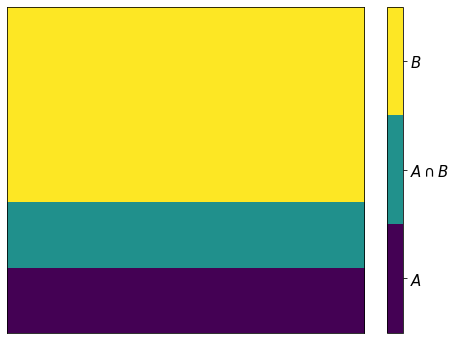

In [13]:
plt.figure(figsize=(8,6))
probDistRect([.2,.2,.6],['$A$','$A\\cap B$','$B$'],cbarLabel="")

Let's use this intuition to solve: **What is the probability that my coin flip was heads or my dice roll was 5?**

That is, what is $\hspace{.25cm} p(H \cup D_5)$? 

The probability of heads is just $p(H)$, and we don't know more than that.

And, $p(D_5) = p(H)\cdot \frac{1}{6} + p(T)\cdot \frac{1}{20}$

$p(H \cap D_5) = p(H)\cdot \frac{1}{6}$

From both the plot and the equation for $p(D_5)$, you can see that we would be double counting $p(H)\cdot \frac{1}{6}$ if we concluded that 
$
\hspace{.25cm}
p(H \cup D_5) = p(H) + p(D_5)
$

Instead, the correct answer accounts for the double counting of the green area in the plot:
$$
p(H \cup D_5) = p(H) + p(D_5)-p(H\cap D_5)
$$

Or, <font color="blue">more generally, for any two outcomes $A$ and $B$, $\hspace{.25cm}p(A\cup B)=p(A)+p(B)-p(A\cap B)$</font>

# Bayes' Theorem

Consider the same two-step random process from before where we first flip coin with probabilities $p(H)$ for heads and $p(T)$ for tails.

If we get heads, then we roll a fair 6-sided dice.

If we get tails, then we roll a fair 20-sided dice.

Originally, I asked: What is $p(D=5)$?

Now, instead, I tell you t$\gap D=5.\gap$ **What is the probability that the coin flip came up heads?**

That is, I want to know the probability of $C=H$ given $D=5$:  $\hspace{.25cm}p(H |D=5)$?

We can look at the dice outcome histogram and consider bar for $D=5$, but we see that $\gap p(D=5)\gap$ depends on $p(H)$ which does not answer our question.

In [14]:
# hide
widgets.interactive(coinFlipDiceGame_1,pH=(0,1,.01))

interactive(children=(FloatSlider(value=0.5, description='pH', max=1.0, step=0.01), Output()), _dom_classes=('…

Let's consider the problem more generally.

Consider outcomes $A$ and $B$ with probabilities $p(A)$ and $p(B)$.

What is the conditional probability $\hspace{.25cm}p(A|B)$?

That is, given $B$ happened, how likely is it for $A$ to happen?

$p(A|B)$ is the area associated with "$A$ and $B$ happen", denoted $A\cap B$, divided by the area that $B$ happens.

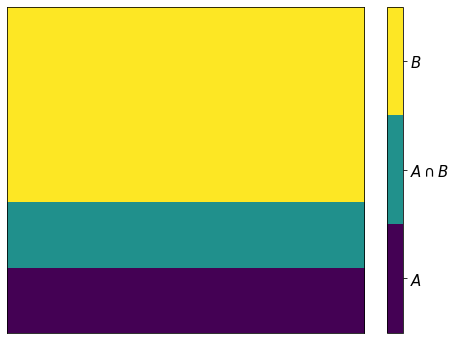

In [15]:
# hide
plt.figure(figsize=(8,6))
probDistRect([.2,.2,.6],['$A$','$A\\cap B$','$B$'],cbarLabel="")

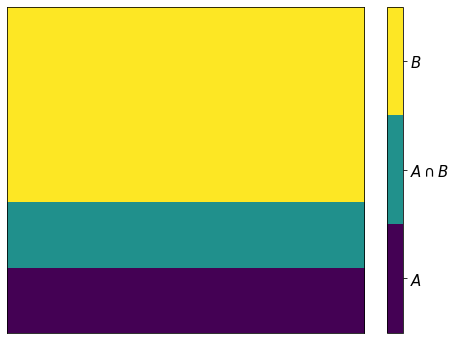

In [15]:
# hide
plt.figure(figsize=(8,6))
probDistRect([.2,.2,.6],['$A$','$A\\cap B$','$B$'],cbarLabel="")

From the plot, we see that 
$
\hspace{.25cm}
\displaystyle
p(A|B)=\frac{\color{darkgreen}{p(A\cap B)}}{\color{orange}{p(B)}}
\hspace{.25cm}
$
and, similarly,
$
\hspace{.25cm}
\displaystyle
p(B|A)=\frac{\color{darkgreen}{p(A\cap B)}}{\color{darkmagenta}{p(A)}}
$

Using these two equations, we have
$$
\color{darkgreen}{p(A\cap B)} = p(A|B)\cdot \color{orange}{p(B)} = p(B|A)\cdot \color{darkmagenta}{p(A)}
$$

Which yields
$
\hspace{.25cm}
\displaystyle
p(A|B) = \frac{p(B|A)\cdot \color{darkmagenta}{p(A)}}{\color{orange}{p(B)}}
$

This derivation gives us ***Bayes' Theorem***
$$
   p(A|B) = \frac{p(B|A)\cdot p(A)}{p(B)}
$$

Bayes' Theorem is immensely important in probability theory and in machine learning. 

We can use it to quickly solve our coinflip-dice roll game: I tell you that I rolled a die and got a 5, what is the probability that the coin flip came up heads?

Let $B$ denote the outcome that the dice roll was 5, and let $A$ denote the outcome that the coin flip was heads.

Our question becomes: What is $\hspace{.25cm}p(A|B)$?

Bayes' Theorem tells us: $\hspace{.25cm}\displaystyle p(A|B) = \frac{p(B|A)\cdot p(A)}{p(B)}$

And we know:
<ul>
    <li>$p(A)=p(H)$, the probability that the coin flip is heads (exact value is currently unknown)</li>
    <li>$p(B)=p(H)/6+p(T)/20$, the probability that the dice roll yielded 5</li>
    <li>$p(B|A)=1/6$, the probability that the dice roll was 5 given a coin flip of heads</li>
</ul>

$
\displaystyle
p(A|B) = \frac{p(B|A)\cdot p(A)}{p(B)}
= \frac{\frac{1}{6}\cdot p(H)}{p(H)/6+p(T)/20}
% =\frac{p(H)}{p(H)+3p(T)/10}
=\frac{p(H)}{p(H)+3(1-p(H))/10}
% =\frac{p(H)}{7p(H)/10+3/10}
=\frac{10p(H)}{7p(H)+3}
$

$
\displaystyle
p(A|B) = \frac{p(B|A)\cdot p(A)}{p(B)}
=\frac{10p(H)}{7p(H)+3}
$

Is not an immediately satisfying solution because we don't know the value of $p(H)$.

We have general relationship between $p(A|B)$ and $p(H)$ using the equation.

Thus, if we repeat this coinflip-dice roll game many times, we can begin to estimate $p(A|B)=p(H|D_5)$ by counting the number of times we observe a heads and a dice roll of 5 during the same trial.

In the plot below, as we become more confident in $p(A|B)$ (the position on the y-axis), we also become more confident in our estimate for $p(H)$ (the location on the x-axis)

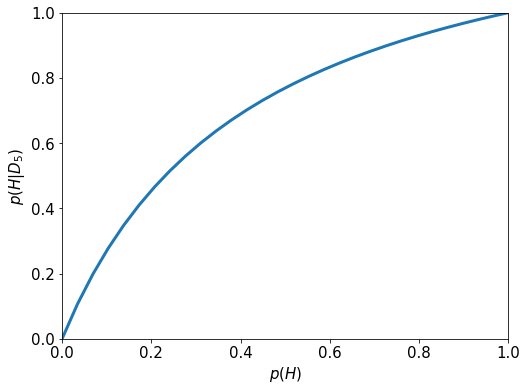

In [16]:
# hide
x = np.linspace(0,1,30)
y = 10*x/(7*x+3)
plt.figure(figsize=(8,6))
plt.plot(x,y,linewidth=3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$p(H)$",fontsize=15)
plt.ylabel("$p(H | D_5)$",fontsize=15);
plt.xlim((0,1))
plt.ylim((0,1));

Bayes' Theorem is useful for machine learning because this equation allows us to estimate $p(A|B)$ with an initial guess and then update our estimate of $p(A|B)$ as we collect new data.

Here, let $H$ denote a hypothesis and $E$ denote the evidence collected so far.

$
\displaystyle
p(H|E) = \frac{p(E|H)\cdot p(H)}{p(E)}=\frac{p(E|H)\cdot p(H)}{p(E|H)\cdot p(H)+p(E|\neg H)\cdot p(\neg H)}
\hspace{.25cm}
$
where $\neg H$ represents "not $H$"

$p(H|E)$ is called the <i>posterior probability</i> and represents the probability that our $H$ hypothesis is correct given the evidence $E$.

<ul>
    <li>$p(H)$ is the <i>prior probability</i> that the hypothesis is correct without additional evidence</li>
    <li>$p(E)$ is the <i>marginal likelihood</i> </li>
    <li>$p(E|H)$ is the <i>likelihood</i> representing the probability of the observed evidence $E$ if we assume the hypothesis $H$ is true</li>
</ul>

We can write Bayes' Theorem differently to make it more useful for hypothesis testing and learning

$
\displaystyle
p(H|E) = \frac{p(E|H)\cdot p(H)}{p(E)}=\frac{p(E|H)\cdot p(H)}{p(E|H)\cdot p(H)+p(E|\neg H)\cdot p(\neg H)}
\hspace{.25cm}
$
where $\neg H$ represents "not $H$"

Or, if we test multiple hypotheses $H_1,H_2,\dots,H_n$, then the probability to hypothesis $H_i$ given the current evidence $E$ is

$
\displaystyle
p(H_i|E) = \frac{p(E|H_i)\cdot p(H_i)}{p(E)}=\frac{p(E|H_i)\cdot p(H_i)}{\sum_{j=1}^n p(E|H_j)\cdot p(H_j)}
\hspace{.25cm}
$

Let's put Bayes' Theorem to use.

Imagine there is a COVID-19 test that is widely used across the US. In general, the test is positive 80% of the time; the event of a positive test result has probability $\hspace{.25cm}\color{blue}{p(\text{test positive})}=0.80.\gap$ Some of these positive outcomes will be false positives and some will be true postives.

However, in controlled lab experiments, pharmaceutical companies show that the test correctly detects a COVID infection 90% of the time. That is, $\hspace{.25cm}\color{red}{p(\text{test positive}|\text{COVID infected})} = 0.90$ 

You guess that there is a 70% chance that you have COVID. That is, you currently believe $\hspace{.25cm}\color{orange}{p(\text{COVID infected})}=0.70$

So, you take the COVID test, and it comes back positive. **What is the probability that you actually have a COVID infection (i.e., what is $\color{darkmagenta}{p(\text{COVID infected}|\text{test positive})}$)?**

Here, your hypotheses are $H=\text{COVID positive}$ and $\neg H=\text{not COVID positive}$, and your evidence $E$ is the positive COVID test.

We can solve the problem by plugging in the information to Bayes' Theore:

$
\displaystyle
p(H|E) = \frac{p(E|H)\cdot p(H)}{p(E)}
$

$
\displaystyle
\rightarrow
\color{darkmagenta}{p(\text{COVID infected}|\text{test positive})}
= \frac{ \color{red}{p(\text{test positive}|\text{COVID infected})}\cdot \color{orange}{p(\text{COVID infected})} }{  \color{blue}{p(\text{test positive})}}
= \frac{0.90\cdot0.70}{0.80}
=0.7875
$

Moving forward, your belief that you have COVID increases from $\hspace{.25cm}\color{orange}{p(\text{COVID infected})}=0.70\hspace{.25cm}$ to $\hspace{.25cm}\color{darkmagenta}{p(\text{COVID infected}|\text{test positive})}=0.7875\hspace{.25cm}$ with the evidence of a positive COVID test.

If your roommate has been in contact with you and also tests positive, then they might repeat this process with the prior belief of $\hspace{.25cm}\color{orange}{p(\text{COVID infected})}=0.7875\hspace{.25cm}$ instead of your initial prior belief.

These additional positive tests are additional evidence that can be used to again update beliefs of a COVID infection.

$
\displaystyle
\color{darkmagenta}{p(\text{COVID infected}|\text{test positive})}
= \frac{ \color{red}{p(\text{test positive}|\text{COVID infected})}\cdot \color{orange}{p(\text{COVID infected})} }{  \color{blue}{p(\text{test positive})}}
= \frac{0.90\cdot0.7875}{0.80}
=0.8859
$

From this example, you can see how additional evidence allows us to ***learn*** and update our beliefs about the probability of an outcome (here, a COVID infection given a positive test).

# Programming Bayesian Inference to Learn from Data

I have two coins. One is fair (unweighted) and the other is weighted so that a coin flip yields heads 60% of the time.

I hand you a coin but you do not know if it is fair or weighted.

You inspect the coin and don't notice anything strange. It's feels like a normal coin.

So, your initial hypothesis $H$ is that the coin is fair and, because there were two possible coins, your belief in $H$ is $\hspace{.25cm}p(\text{heads}|H)=1/2$

The alternative hypothesis $\neg H$ is that the coin is weighted and $p(\text{heads}|\neg H)=6/10$

In [17]:
# hide
# seed the random number generator so that data is reproducible
R = np.random.RandomState(1234)
coinFlips = R.choice([0,1],size=100,p=[.4,.6])
coinFlips

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

You conduct a series of coin flip outcomes (1 for heads) and we can use Bayes' Theorem to update our belief in the hypothesis $H$ that the coin is fair.

In [18]:
coinFlips[:3]

array([0, 1, 1])

Our current belief is that $\hspace{.25cm}p(H)=1/2\hspace{.25cm}$ and $\hspace{.25cm}p(\neg H)=1/2$

The first coin flip outcome gives us the current evidence $E=[0]$

Under the hypothesis $H$, we have $\hspace{.25cm}p(\text{heads}|H)=1/2$, 
$
\hspace{.25cm}
\displaystyle 
p(E|H)=\frac{1}{2}
$

Across $H$ and $\neg H$, we have
$
\hspace{.25cm}
\displaystyle
p(E) = p(H)\cdot\frac{1}{2}+p(\neg H)\cdot\frac{4}{10} = \frac{1}{2}\cdot\frac{1}{2}+\frac{1}{2}\cdot\frac{4}{10}=\frac{9}{20}
$

Using Bayes' Theorem, we have
$$
p(H|E) 
= \frac{p(E|H)\cdot p(H)}{p(E)}
= \frac{ \frac{1}{2}\cdot\frac{1}{2} }{\frac{9}{20}}
=\frac{5}{9}
$$

Thus, moving forward, we believe the probability that hypothesis $H$ is correct is $\hspace{.25cm}p(H)=5/9$

We can repeat this process to **<i>update our belief</i>** in hypothesis $H$ with each new coin flip.

If we flip the coin many times, then our belief will converge to a final answer.

In [19]:
# coinFlips
PHs = np.zeros((len(coinFlips)+1,3))
# initial belief in H
ph = np.array([1/2,1/4,.75])
PHs[0,:] = ph
for i in range(len(coinFlips)):
    outcome = coinFlips[i]
    p_e_given_H = 1/2
    p_e_given_not_H = 6/10 if outcome == 1 else 4/10
    p_e = ph*p_e_given_H  + (1-ph)*p_e_given_not_H
    # Bayes' Theorem
    p_h_given_e = p_e_given_H * ph / p_e
    ph = p_h_given_e 
    PHs[i+1,:] = ph

In [20]:
# hide
def plotBayesInference(n):
    plt.figure(figsize=(8,6))
    if n == 0:
        for i in range(PHs.shape[1]):
            plt.plot(0,PHs[0,i],'o')
    else:
        p = PHs[:(n+1),:]
        for i in range(PHs.shape[1]):
            plt.plot(np.arange(len(p)),p[:,i],'-',linewidth=5)
    plt.ylim((0,1))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Coin Flips in Evidence",fontsize=15)
    plt.ylabel("Belief in $H$ ($p(H|E)$)",fontsize=15)
    
widgets.interactive(plotBayesInference,n=(0,len(PHs),1))

interactive(children=(IntSlider(value=50, description='n', max=101), Output()), _dom_classes=('widget-interact…

# Discrete Probability Distributions

## Bernoulli Distribution 

Previously, I handed you a potentially weighted coin and we observed several flips of the coin to determine if the coin was fair or weighted.

Another approach to solving this problem is to consider the distribution of heads and tails we observe through experimentation compared to the distribution we expect to see if we use a fair coin.

In the Bayes' Theorem approach, we learn about the likelihood that the coin is fair with each coin flip one at a time.

Here, we will imagine that we have conducted all of the coin flips already and examine the complete data set all at once.

But what should our "expected" distribution be?

The **Bernoulli Distribution** is one of the simplest and most fundamental distributions in probability theory and statistics. 

It models the outcome of a single experiment or trial that has exactly two possible outcomes: success ("heads" in our case) and failure ("tails"). 

Named after the Swiss mathematician Jacob Bernoulli, this distribution serves as the building block for more complex distributions and models.

A Bernoulli random variable $X$ is defined as follows:

$$
X = 
\begin{cases} 
1 & \text{with probability } p \\
0 & \text{with probability } 1-p 
\end{cases}
$$
where $0 \leq p \leq 1$ is the probability of success.

The ***Probability Mass Function (PMF)*** of a Bernoulli distribution can be written compactly as:

$
P(X = x) = p^x (1 - p)^{1 - x}, \quad x \in \{0, 1\}
$


In [21]:
# hide
def plotBernoulliDist(p,showExpValue=False):
    plt.bar([0,1],[1-p,p],width=.1,)
    plt.text(1,p,"$p$",ha="center",va="bottom",fontsize=20)
    plt.text(0,1-p,"$1-p$",ha="center",va="bottom",fontsize=20)
    if showExpValue:
        plt.plot([p,p],[0,1],'k--',linewidth=3)
        plt.text(p,.95,"Expected\nValue",ha="left",va="top",fontsize=15)
    plt.ylim((0,1))
    plt.xticks([0,1],["Tails (0)","Heads (1)"],fontsize=15)
    plt.xlabel("Coin Flip Outcome",fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel("Probability Mass Function (PMF)",fontsize=15)
    plt.title("Bernoulli Distribution",fontsize=15)

def plotBernoulli(p,showExpValue=False):
    plt.figure(figsize=(8,6))
    plotBernoulliDist(p,showExpValue)
    
# plotBernoulli(.2)
widgets.interactive(plotBernoulli,p=(0,1,.05),showExpValue=False)

interactive(children=(FloatSlider(value=0.0, description='p', max=1.0, step=0.05), Checkbox(value=False, descr…

We can compare random processes through their long-term expected values which represent the average outcome after many trials of the random process.

I introduced expected values in the module on random sampling and the Normal Distribution.

If a random variable takes on the possible values $Z=\{z_1,z_2,\dots,\}$ each probability $p(z_0),p(z_1),\dots$, then 
$
\hspace{.25cm}
\displaystyle
E[Z] = \sum_{z\in Z}z\cdot p(z)
$

For the Bernoulli Distribution, $\hspace{.25cm}X=\{0,1\}\hspace{.25cm}$ with probabilities $\hspace{.25cm}P(X=1)=p, P(X=0)=1-p$

Therefore,
$
\hspace{.25cm}
E[X] = p\cdot1+(1-p)\cdot0 = p
$

In [22]:
# hide
widgets.interactive(plotBernoulli,p=(0,1,.05),showExpValue=True)

interactive(children=(FloatSlider(value=0.0, description='p', max=1.0, step=0.05), Checkbox(value=True, descri…

Also from the Random Sampling module, we measure how "wide" a probability distribution using it's **variance**.

If $D$ is some probability distribution, it's variance is

$
\hspace{1cm}
Var(D) = E\left[\left(D-E[D]\right)^2\right] = \displaystyle\sum_{d\in D} \left(d-E[D]\right)^2\cdot p(D=d)
$

You can think about this as the "expected distance between outcomes in the distribution and the distribution's expected value."

If $Var(D)$ is small, then the distribution is very bunched around $E[D]$.

IF $Var(D)$ is large, then the distribution is spread out around it's center $E[D]$.

For the Bernoulli Distribution, 
$
\hspace{.25cm}
\displaystyle
Var(X) = \color{blue}{p\cdot(1-p)^2}+\color{red}{(1-p)\cdot(0-p)^2} 
= \color{blue}{p-2p^2+p^3}+\color{red}{p^2-p^3}
=p(1-p)
$

In [23]:
# hide
def bernoulliVarPlot(P):
    p = np.linspace(0,1,30)
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.plot(p,p*(1-p),'-',linewidth=5)
    plt.plot(P,P*(1-P),'ro',markersize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Heads Probability ($p$)",fontsize=15)
    plt.ylabel("Bernoulli Variance ($Var(X)$)",fontsize=15)
    plt.subplot(1,2,2)
    plotBernoulliDist(P,True)
    
widgets.interactive(bernoulliVarPlot,P=(0,1,.05))

interactive(children=(FloatSlider(value=0.0, description='P', max=1.0, step=0.05), Output()), _dom_classes=('w…

## Binomial Distribution

How do we use the Bernoulli Distribution to check if our coin is fair or weighted?

Testing if a coin is fair or weighted using the Bernoulli distribution involves performing a hypothesis test. 

A generalization of the hypotheses in the Bayes' Theorem example, our current hypotheses are:
1. **Null Hypothesis ($H_0$)**: The coin is fair. $p = 0.5$
2. **Alternative Hypothesis ($H_1$)**: The coin is not fair. $ p \neq 0.5$



Next, we toss the coin $n$ times. Let $X_i$ be the outcome of the $i$-th toss where $X_i = 1$ if heads and  $X_i = 0$ if tails.


We sum the outcomes to determine the number of heads:
$
\gmath
S = \sum_{i=1}^{n} X_i
$

This sum $S$ ranges in possible values from $S=0$ to $S=n.\gap$ But what is the probability of each outcome?

For example, assume $S=0$. How many different series of $n$ coin flips could produce this result?

For $S=0$, there is only one possible series of coin flips where every coin flip comes up tails. $X_i=0$ for each $i$.

How likely is this series of outcomes?

$P(X=0)=1-p$ and $n$ coin flips each yielded tails, so $\gap P(S=0)=P(X_1=0\,\cap\, X_2=0 \cap\dots\cap X_n=0)=(1-p)^n$

For $S=1$, exactly one coin flip out of $n$ was heads and each other coin flip was tails.

It's tempting to conclude that $\gap P(S=1)=p(1-p)^{n-1}\gap$ but this is missing that the single heads outcome could have been the first coin flip, or second, or third, etc.

In other words 
$$
P(\color{red}{X_1=1}\cap X_1=0 \cap\dots\cap X_n=0)=P(X_1=0\cap \color{red}{X_1=1} \cap\dots\cap X_n=0)=\cdots=P(X_1=0\cap X_1=0 \cap\dots\cap \color{red}{X_n=1})
=p(1-p)^{n-1}
$$

There are $n$ possible series that each yield $S=1$ so we need to sum the probabilities across each of these cases:
$$
P(S=1) = n\cdot p(1-p)^{n-1}
$$

In general, what is $\gap P(S=s)\gap$ for $\gap s=0,1,2,\dots,n$?

$S=s$ means that, out of $n$ coin flips, exactly $s$ of them were heads and $n-s$ of them were tails.

So it's tempting to think $\gap P(S=s)=p^s(1-p)^{n-s}\gap$... but this is again missing that there are multiple different series of $n$ coin flips satisfying $S=s$!

To count how many different coin flip series meet our conditions, we use the ***choose operator***
$$
{n \choose s} = \frac{n\cdot(n-1)\cdots2\cdot1}{\left( (n-s)(n-s-1)\cdots2\cdot1 \right)\left( s(s-1)(s-2)\cdots 2\cdot1 \right)} = \frac{n!}{(n-s)!\cdot s!}
$$

$n!=n(n-1)(n-2)\cdots2\cdot1$ is called "$n$ factorial" and represents the number of ways to reorder a series of $n$ coin flips.

$(n-s)!$ is the number of reorderings that are duplicates based on the placement of the tails outcomes and, similarly, $s!$ is the number of reorderings that are duplicates based on the placement of the heads outcomes.

Dividing by $(n-s)!\cdot s!$ controls for double counting identical series of coin flip outcomes after reordering.

So, putting it all together: 
$
\gmath
P(S=s) = {n \choose s} p^s (1-p)^{n-s}
$

This gives us yet another probability distribution called the ***Binomial Distribution***

The Binomial Distribution represents the probability of a number of successes in a sequence of $n$ independent experiments, each asking a yes–no question.


In [24]:
# hide
import scipy.stats as stats

# Slider for number of trials (n)
n_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Trials (n)')

# Slider for probability of success (p)
p_slider = widgets.FloatSlider(value=0.5, min=0.0, max=1.0, step=0.01, description='Probability (p)')

showCountBinom = widgets.Checkbox(value=True,description="Show Number of Heads:")

def plot_binomial_distribution(n, p,counts=True):
    """Plots a binomial distribution based on number of trials (n) and probability of success (p)."""
    x = np.arange(0, n + 1)
    binom_pmf = stats.binom.pmf(x, n, p)
    if not counts:
        x = x.astype(float)/n
    plt.figure(figsize=(10, 6))    
    plt.bar(x, binom_pmf,
           width=.9 if counts else .9*(x[1]-x[0]),
           )
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    if counts:
        plt.xlabel('Number of Successes',fontsize=15)
    else:
        plt.xlabel("Proportion of Successes",fontsize=15)
    plt.ylabel('Probability',fontsize=15)
    plt.title(f'Binomial Distribution (n={n}, p={p})',fontsize=15)

# widgets.interactive(plot_binomial_distribution, n=n_slider, p=p_slider)
widgets.HBox(
[
    widgets.VBox([n_slider,p_slider,showCountBinom]),
    widgets.interactive_output(
        plot_binomial_distribution, {
        'n': n_slider, 
        'p': p_slider,
            "counts":showCountBinom,
        }),
])

Our hypotheses:
1. **Null Hypothesis ($H_0$)**: The coin is fair. $p = 0.5$
2. **Alternative Hypothesis ($H_1$)**: The coin is not fair. $ p \neq 0.5$

We test the hypotheses by tossing our coin $n$ times and counting the number of heads $S$ through the infered $\widehat{p}$ given our data: $\gap \widehat{p}=S/n$

What is $\gap p(\widehat{p}|H_0)$?

We know $\gap p(\widehat{p}|H_0)$ using the Binomial Distribution: $\gmath P(S=s) = {n \choose s} p^s (1-p)^{n-s}\gap$ with $\gap p=1/2\gap$ and converting the counts predicted by the Binomial Distribution to proportions of heads instead.

This gives us a **Null Model** with which to test if our observation occured by chance given the assumption of a fair coin.

In [25]:
# hide
def plotBinomialAndS(phat,n):
    plot_binomial_distribution(n,.5,False)
    y = plt.ylim()
    plt.plot([phat,phat],y,'r-',linewidth=5)
    plt.text(phat,y[1]*.95,"$\\widehat{p}$",ha="right",va="top",fontsize=20,color='r')
    plt.ylim(y)
    
# plotBinomialAndS(10,100)
phat_slider = widgets.FloatSlider(min=0,max=1,step=.01,value=.2,description="Prop. of Observed Heads (p_hat):")
widgets.HBox(
[
    widgets.VBox([phat_slider,n_slider]),
    widgets.interactive_output(
        plotBinomialAndS, {
            'phat':phat_slider,
        'n': n_slider, 
        }),
])

The **Binomial Test Statistic** is calculated according to the Z-score for the sample proportion:

$$
Z = \frac{\widehat{p} - 0.5}{\sqrt{\frac{0.25}{n}}} = \frac{\widehat{p} - 0.5}{\frac{1}{2\sqrt{n}}} = 2\sqrt{n}(\widehat{p} - 0.5)
$$

This **Z score** is then compared to a Normal Distribution with $\gap\mu=0,\sigma=1\gap$ to calculate the probability (called p-value) of an outcome at least as rare as Z. Z is measuring the number of standard deviations $\sigma$ away from the mean.

With the test statistic, we:

1. First choose a significance threshold $\alpha$, commonly 0.05 for a 5% significance level, that we will use to determine if our data is surprising given the null model.
2. Determine the critical value for the chosen $\alpha$. For a two-tailed test, the critical values are $\gap\pm Z_{\alpha/2}$. For $\alpha = 0.05$, the critical values are approximately $\pm 1.96$.
3. Compare the calculated Z-score with the critical values.

If the Z-score falls outside the range of $\gap -1.96\gap$ to $\gap1.96\gap$, you reject the null hypothesis $H_0$ as incorrect. Otherwise, you fail to reject $H_0$.

Note, with this process, you never show that the null hypothesis is wrong; just that your data is surprising given the null hypothesis (i.e., $\gap P(\widehat{p}|H_0) < 0.05\gap$).

Is 0.000 less than alpha=0.05?


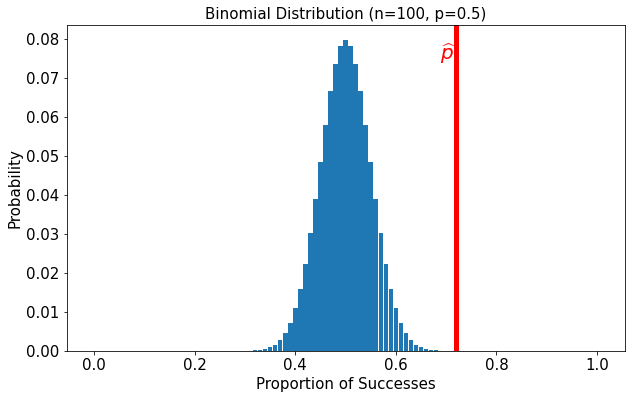

In [59]:
import scipy.stats as stats
# let's create some data using a weighted coin
coinFlips = np.random.choice([0,1],size=100,p=[.3,.7])
# now pretend we do not know if the coin is fair or weighted.
# Use the Binomial Test to statistically test if our data
# leads us reject the null hypothesis that the coin is actually fair
S = np.sum(coinFlips)
n = len(coinFlips)
test_result = stats.binomtest(
    S, # number of heads in data
    n, # number of coin flips in data
    p=0.5, # null hypothesis for fair coin
    # test if coin is weighted to increase or decrease likelihood of heads
    alternative='two-sided', 
)
test_pvalue = test_result.pvalue
print("Is %0.3f less than alpha=0.05?" % test_pvalue)
# if not, try increasing the number of coin flips in the data
plotBinomialAndS(S/n,n)

## Geometric Distribution

Imagine you are single and looking for a dating partner. You go on dates with random potential partners from the dating pool unitl you find a winner. How many dates will you need to go before you find a winner?

You can model this problem like flipping a weighted coin where $p$ is the probability of getting a heads or dating a winner. 

If $\gap P(C=\text{heads})=p,\gap$ then what is the probability that the first heads occurs on the $n$th coin flip?

The ***Geometric Distribution*** models this probability. Let $X$ be the random variable denoting the number of coin flips until the first heads:
$
\gmath
P(X=n) = (1-p)^{n-1}p
$

In the visualization, use the slider to vary to probability that the coin flip is heads.

In [60]:
# hide 
def plotGeometricDist(p):
    plt.figure(figsize=(10,7))
    N = np.arange(20)
    P = (1-p)**N*p
    plt.bar(N+1,P)
    plt.ylim((0,1))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Num. Coin Flips to First Heads ($n$)",fontsize=15)
    plt.ylabel("Probability $P(X=n)$",fontsize=15)
    
widgets.interactive(plotGeometricDist,p=(0,1,.05))

interactive(children=(FloatSlider(value=0.0, description='p', max=1.0, step=0.05), Output()), _dom_classes=('w…

So, many dates will you need to go on? We can answer this question using expected values.

But we will need to use the geometric series:

$
\gmath
\sum_{i=0}^\infty a\cdot x^i
=
\begin{cases}
\frac{a}{1-x}, & |x|<1 \\
\infty, & |x|>1 \\
\infty, & x=1 \\
\text{alternates }a\text{ and }0, & x=-1 \\
\end{cases}
$

In [28]:
#hide 
n_slider = widgets.IntSlider(value=10, min=1, max=50, step=1, description='number of terms (n)')
r_slider = widgets.FloatSlider(value=0.5, min=0.1, max=1.3, step=0.01, description='x')

def plot_geometric_sum(n, r):
    terms = [r**i for i in range(n)]
    partial_sums = [sum(terms[:i+1]) for i in range(n)]
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(n), partial_sums, marker='o', linestyle='-', color='b',linewidth=3,markersize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f'Convergence of Geometric Sum for $x = {r}$',fontsize=15)
    plt.xlabel('Number of Terms ($n$)',fontsize=15)
    plt.ylabel('Partial Sum',fontsize=15)
    plt.grid(True)

# widgets.interactive(plot_geometric_sum, n=n_slider, r=r_slider)
widgets.HBox(
[
    widgets.VBox([n_slider,r_slider]),
    widgets.interactive_output(
        plot_geometric_sum, {
        'n': n_slider, 
            'r': r_slider, 
        }),
])

The expected value for the Geometric Distribution is

$
\gmath
\begin{align}
E[X] &= \sum_{n=1}^\infty n\cdot (1-p)^{n-1}p
= p\color{red}{\sum_{n=1}^\infty n\cdot (1-p)^{n-1}}
\\\\
&= p\cdot\color{red}{\frac{d}{dp}\left(-\sum_{n=1}^\infty (1-p)^n\right)}
= p\cdot\color{red}{\frac{d}{dp}\left(-\frac{1}{p}\right)}
\hspace{.5cm}
\text{using the convergence of the Geometric Series}
\\\\
&= p\cdot\color{red}{\frac{1}{p^2}} = \frac{1}{p}
\end{align}
$

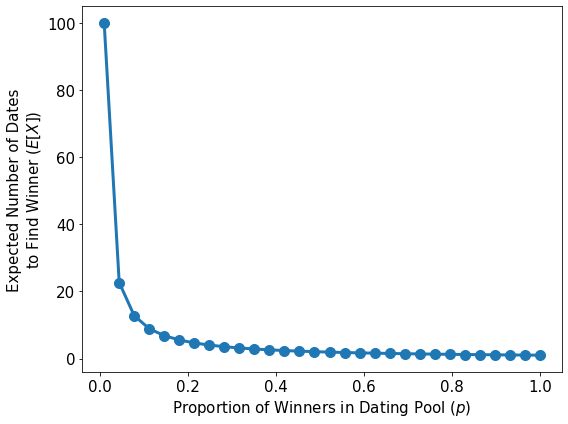

In [29]:
# hide
p = np.linspace(.01,1,30)
E = 1/p
plt.figure(figsize=(8,6))
plt.plot(p,E,'-o',linewidth=3,markersize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Proportion of Winners in Dating Pool ($p$)",fontsize=15)
plt.ylabel("Expected Number of Dates\nto Find Winner ($E[X]$)",fontsize=15)
plt.tight_layout()

## Poisson Distribution

The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space, provided these events occur with a known constant mean rate and are independent of the time since the last event.

Let $\gap X\gap$ be a random variable representing the number of events in a fixed interval. The probability mass function (PMF) of $X$ is:
$
\gmath
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$

where:
- $\lambda\gap$ is the average number of events in the interval (rate parameter),
- $k\gap$ is the actual number of events,
- $e\gap$ is the base of the natural logarithm ($\gap e\approx 2.71828\gap$)



In [46]:
# hide
from scipy.stats import poisson

def plot_poisson(lambda_value):
    """
    Plots the Poisson distribution for a given lambda value.

    Args:
        lambda_value (float): The lambda parameter for the Poisson distribution.

    Returns:
        None
    """
    x = np.arange(0, 30)
    y = poisson.pmf(x, lambda_value)

    plt.figure(figsize=(10, 6))
    plt.bar(x, y, width=0.8, )
    plt.ylim((0,.4))
    plt.title(f'Poisson Distribution (λ={lambda_value})',fontsize=15)
    plt.xlabel('Number of Events ($k$)',fontsize=15)
    plt.ylabel('Probability $P(X=k)$',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

lambda_slider = widgets.FloatSlider(value=5, min=.1, max=15, step=0.5, description='λ')
widgets.interactive(plot_poisson, lambda_value=lambda_slider)

interactive(children=(FloatSlider(value=5.0, description='λ', max=15.0, min=0.1, step=0.5), Output()), _dom_cl…

Deriving the Expected Value

1. **Substitute the PMF into the Formula for Expected Value**:
   $$
   E[X] = \sum_{k=0}^{\infty} k \cdot \frac{\lambda^k e^{-\lambda}}{k!}
   $$

2. **Simplify the Summation**:
   Note that for $k = 0$, the term is 0 since $\gap k \cdot P(X = k) = 0.\gap$ Therefore, we can start the summation from $k = 1$:
   $$
   E[X] = \sum_{k=1}^{\infty} k \cdot \frac{\lambda^k e^{-\lambda}}{k!}
   $$

3. **Rearrange the Summation**:
   We can express $k$ as $\gap k = (k-1) + 1\gap$ and then break the sum into two parts. However, notice that we can factor out $\gap\lambda e^{-\lambda}\gap$ and use the following trick:
   $$
   E[X] = \sum_{k=1}^{\infty} \frac{k \lambda^k e^{-\lambda}}{k!} = \lambda e^{-\lambda} \sum_{k=1}^{\infty} \frac{\lambda^{k-1}}{(k-1)!}
   $$

4. **Change the Index of Summation**:
   Let $\gap j = k-1.\gap$ When $k = 1$, \$j = 0$, and as $k\rightarrow\infty$, so does $j$:
   $
   \gmath
   E[X] = \lambda e^{-\lambda} \sum_{j=0}^{\infty} \frac{\lambda^j}{j!}
   $

5. **Recognize the Exponential Series**:
   The series inside the summation is the [Taylor series expansion](https://en.wikipedia.org/wiki/Taylor_series) of $e^\lambda$:
   $
   \gmath
   e^\lambda = \sum_{j=0}^{\infty} \frac{\lambda^j}{j!}
   $

6. **Complete the Calculation**:
   Since the series sums to $\gap e^\lambda$:
   $
   \gmath
   E[X] = \lambda e^{-\lambda} \cdot e^\lambda = \lambda
   $

The Poisson distribution is particularly useful for modeling rare events when the events are independent and the average rate is known. 

For example, a common real-world application of the Poisson distribution is modeling the number of incoming calls at a call center over a given period of time.

**Scenario**: Suppose a call center receives an average of 10 calls per hour. We want to find the probability that exactly 7 calls will be received in the next hour.

**Parameters**:
- Average rate $\lambda$: 10 calls per hour
- Number of events ($k$): 7 calls

**Calculation**:
$
\gmath
P(X = 7) = \frac{10^7 e^{-10}}{7!} \approx \frac{453.9992976}{5040} \approx 0.090
$

Therefore, the probability that exactly 7 calls will be received in the next hour is approximately 0.090, or 9\%.

## Discrete Uniform Distribution

The discrete uniform distribution is a probability distribution where a finite number of outcomes are equally likely to occur. If there are $n$ possible outcomes (e.g., 6 sides of a fair dice), each outcome has a probability $\gap P(X=x)=\frac{1}{n}$

Let $X$ be a discrete random variable that takes on one of $n$ possible values: $\gap\{x_1, x_2, \ldots, x_n\} \gap$. The probability mass function (PMF) of $X$ is given by:
$$
P(X = x_i) = \frac{1}{n} \quad \text{for } i = 1, 2, \ldots, n
$$

In [31]:
# hide
def plotUniform(n):
    p = 1/n*np.ones(n)
    plt.bar(np.arange(n)+1,p)
    plt.ylim((0,1))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Outcome $x$",fontsize=15)
    plt.ylabel("Probability $P(X=x)$",fontsize=15)
    plt.tight_layout()
    
widgets.interactive(plotUniform,n=(1,20,1))

interactive(children=(IntSlider(value=10, description='n', max=20, min=1), Output()), _dom_classes=('widget-in…

Some useful properties of the Uniform distribution:
1. **Equal Probabilities**: Every outcome has the same probability:
   $
   \gmath
   P(X = x_i) = \frac{1}{n}
   $
2. **Sum of Probabilities**:
   Since the probabilities must sum to 1 for a valid probability distribution:
   $
   \gmath
   \sum_{i=1}^n P(X = x_i) = \sum_{i=1}^n \frac{1}{n} = 1
   $
3. **Mean (Expected Value)**:
   The mean of a discrete uniform distribution is given by:
   $
   \gmath
   E[X] = \frac{1}{n} \sum_{i=1}^n x_i
   $
4. **Variance**:
   The variance of a discrete uniform distribution is:
   $
   \gmath
   \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - E[X])^2
   $

A classic example of a discrete uniform distribution is rolling a fair six-sided die. Each face of the die has an equal probability of landing face up.

- **Possible Outcomes**: $\gap\{1, 2, 3, 4, 5, 6\} $
- **Number of Outcomes**: $\gap n = 6$
- **Probability of Each Outcome**:
    $
    \gmath
  P(X = x) = \frac{1}{6} \quad \text{for } x = 1, 2, 3, 4, 5, 6
  $

**Expected Value (Mean)**:
$
\gmath
\color{red}{E[X] = \frac{1}{6} (1 + 2 + 3 + 4 + 5 + 6) = \frac{7}{2} = 3.5}
$

**Variance**:

$
\gmath
\sigma^2 = \color{blue}{E[X^2]} - (\color{red}{E[X]})^2
\hspace{.25cm}
$
by definition.

$
\gmath
\color{blue}{E[X^2] = \frac{1}{6} (1^2 + 2^2 + 3^2 + 4^2 + 5^2 + 6^2) = \frac{91}{6}}
\gap
$

And so
$
\gmath
\sigma^2 = \color{blue}{\frac{91}{6}} - \left(\color{red}{\frac{7}{2}}\right)^2 =  \frac{35}{12}
\gap
$



### Application in Practice: Equal Likelihood for Tasks

In a classroom setting, suppose a teacher wants to randomly assign homework problems from a set of 10 problems, ensuring each problem has an equal chance of being assigned. This is an example of using a discrete uniform distribution.

- **Possible Outcomes**: $\gap \{1, 2, 3, \dots, 10\}$
- **Number of Outcomes**: $\gap n = 10$
- **Probability of Each Outcome**:
  $
  \gmath
  P(X = x) = \frac{1}{10} \quad \text{for } x = 1, 2, 3, \dots, 10
  $

**Expected Value (Mean)**:
$
\gmath
E[X] = \frac{1}{10}(1 + 2 + 3 + \dots + 10) = \frac{11}{2} 
$

**Variance**:
Using the formula for the variance of the discrete uniform distribution,
$
\gmath
\sigma^2 = E[X^2] - (E[X])^2
$

$
\gmath
E[X^2] = \frac{1}{10} (1^2 + 2^2 + 3^2 + \dots + 10^2) = \frac{77}{2} 
$


$
\gmath
\sigma^2 = \frac{77}{2} - \left( \frac{11}{2}\right)^2 = \frac{33}{4}
$


Instead of discrete outcomes, what if outcomes are continuous?

For example, Numpy's default random number generator generates random numbers from the continuous real-number interval $\gap [0,1)$

The ***Continuous Uniform Distribution*** describes a random variable $\gap X\in[a,b)\gap$ such that $P(X=x)=p$ for all $\gap x\in[a,b)$

This means that $X$ can be any real-number between $a$ and $b$ and each real-number on the interval $\gap [a,b)\gap$ is equally likely.

We will use $\gap U_{[a,b)}\gap$ to denote the continuous uniform distribution and it's interval.

In [85]:
# generate 10 random numbers using numpy
np.random.random(10)

array([0.68912689, 0.47625027, 0.27296202, 0.69683118, 0.46873962,
       0.97321516, 0.3938037 , 0.3910308 , 0.64391257, 0.88466435])

Here is a plot what this looks like. First, let's look at $\gap U_{[0,1)}$

In [68]:
# hide
def uniformDistUpper(a,b):
    c = 1/(b-a)
    plt.figure(figsize=(8,6))
    plt.fill_between([a,b],[c,c])
    plt.ylim((0,3))
    plt.xlim((-.51,1.1))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Random Number",fontsize=15)
    plt.ylabel("Probability Density Function (PMF)",fontsize=15)
    plt.title("Continuous Uniform Distribution",fontsize=15)
    plt.tight_layout()
    
# widgets.interactive(uniformDistUpper,a=(-.5,1,.1),b=(-.5,1,.1))
uniform_a_slider = widgets.FloatSlider(min=-.5,max=1,step=.1,value=0,description="a:")
uniform_b_slider = widgets.FloatSlider(min=-.5,max=1,step=.1,value=1,description="b:")
widgets.HBox(
    [
        widgets.VBox([uniform_a_slider,uniform_b_slider,]),
        widgets.interactive_output(
        uniformDistUpper, {
        'a': uniform_a_slider, 
            'b': uniform_b_slider, 
        }),
    ]
)

Notice that the y-axis is now the **Probability Density Function (PDF)** instead of a probability mass function (PMF). 

You might be confused to see that $\gap P(X=x)=1\gap$ for all $\gap x\in[a,b),\gap$ but this is where it's useful to think about probability as area.

The total area under the continuous distribution must equal 1: 
$
\gmath
1=\int_a^b P(X=x)\,dx =\int_a^b p\,dx = pb-pa \gap\Rightarrow\gap p=\frac{1}{b-a}
$

For discrete probability distributions, $\gmath E[X] = \sum_{x\in X} x\cdot P(X=x)$

For continuous probability distributions, we replace the sum with and integral: $\gmath E[X] = \int_{x\in X} x\cdot P(X=x)\,dx$

For $\gap U_{[a,b)}:\gap$ 

$$
\color{blue}{E[X]} 
= \int_a^b x\cdot \color{red}{P(X=x)}\,dx 
= \color{red}{\frac{1}{b-a}}\int_a^b x \,dx 
= \color{red}{\frac{1}{b-a}}\cdot \frac{x^2}{2}\Big|_a^b
= \frac{b^2-a^2}{2(b-a)}
=\frac{(b-a)(b+a)}{2(b-a)}
=\color{blue}{\frac{b+a}{2}}
$$

Similarly, we calculate variance using integrals instead of sums:
$$
Var(X) = E[X^2]-\left(\color{blue}{E[X]}\right)^2
% =\int_a^b x^2\cdot P(X=x)\,dx  - \left(\frac{b+a}{2}\right)^2
=\frac{1}{b-a}\int_a^b x^2\,dx  - \left(\color{blue}{\frac{b+a}{2}}\right)^2
=\frac{1}{b-a}\cdot\frac{x^3}{3}\Big|_a^b  - \left(\frac{b+a}{2}\right)^2
=\frac{b^3-a^3}{3(b-a)}  - \left(\frac{b+a}{2}\right)^2
$$

$$
=\frac{a^{2}}{3} + \frac{a b}{3} + \frac{b^{2}}{3} -\frac{a^{2}}{4} - \frac{a b}{2} - \frac{b^{2}}{4}
=\frac{1}{12}(b-a)^2
$$

$U_{[a,b)}\gap$ is used to generate random samples from other probability distributions.

If we want to generate data that respects the probability distribution $\gap P(X=x),\gap$ 
- if $\gap P(X=x)\gap$ is discrete, then we consider the **Cumulative Mass Function (CMF)**: $\gmath CMF(X=x) = \sum_{k=a}^x P(X=k)$
- if $\gap P(X=x)\gap$ is continuous, then we consider the **Cumulative Density Function (CDF)**: $\gmath CDF(X=x) = \int_{a}^x P(X=k)\,dk$

In [34]:
# example: generate random numbers drawn from a Poisson distribution with lambda=2
poisson = lambda x: (2**x * np.exp(-2)) / np.exp(np.sum(np.log(np.arange(1,x+1))))
# note the possible values for Poisson distribution range from [0,\infty)
print((poisson(2),poisson(10),poisson(50)))
# Poisson CMF approximation for [1,50]
poisson_CMF = np.cumsum([poisson(i) for i in range(0,50)])
# use Numpy random to generate random numbers uniformly from [0,50)
unif_numbers = np.random.random(1000)

(0.2706705664732254, 3.818985064877964e-05, 5.0099794781991344e-51)


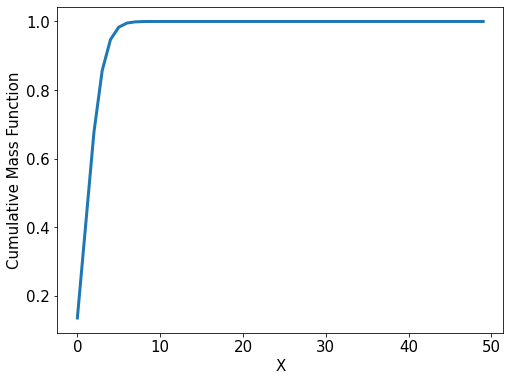

In [35]:
#hide
plt.figure(figsize=(8,6))
plt.plot(poisson_CMF,linewidth=3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Cumulative Mass Function',fontsize=15)
plt.xlabel("X",fontsize=15);

In [54]:
# generate Poisson-distributed data
data = np.zeros(len(unif_numbers))
for i in range(len(unif_numbers)):
    unum = unif_numbers[i]
    num = None
    for j in range(len(poisson_CMF)):
        if poisson_CMF[j] >= unum:
            num = j
            break
    if num is None:
        num = len(poisson_CMF)
    data[i] = num
data[:10]

array([4., 4., 0., 4., 5., 2., 3., 2., 0., 2.])

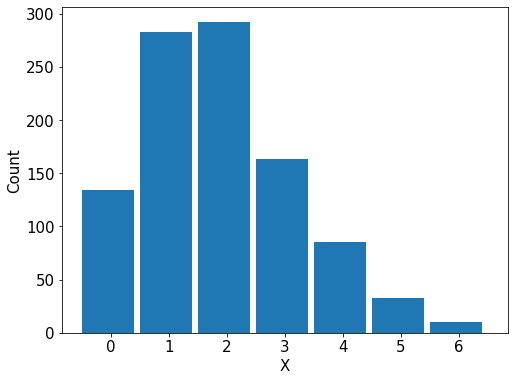

In [56]:
# hide
plt.figure(figsize=(8,6));
plt.hist(data,bins=np.arange(np.min(data),np.max(data)+1),width=.9,align="left")
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=15);plt.xlabel("X",fontsize=15);

## Normal Distribution

We saw the Normal Distribution in a previous module. But let's revisit it here.

The Normal Distribution is described by the continuous probability distribution:
$$
P(X=x)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}
$$
where $\gap\mu\gap$ is the distribution's expected value and $\gap\sigma\gap$ is the distribution's standard deviation (i.e., the square root of the variance).

The Normal Distribution allows us to prescribe the expected value and the variation around that value by picking $\gap\mu,\sigma$

For the **standard Normal Distribution,** $\gap\mu=0,\sigma=1$

In [38]:
#hide 

def normal(mu,sigma):
    x = np.linspace(-20,20,500)
    y = np.exp(-(x-mu)**2/(2*sigma**2)) / np.sqrt(2*np.pi*sigma**2)
    return x,y

def plotNormal(mu,sigma):
    x,y = normal(mu,sigma)
    plt.figure(figsize=(8,6))
    plt.fill_between(x,y,)
#     plt.ylim((0,np.max(y)))
    plt.ylim((0,.5))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("$x$",fontsize=15)
    plt.ylabel("$P(X=x)$",fontsize=15)
    plt.title("N(%0.2f,%0.2f)" % (mu,sigma),fontsize=15)
    plt.tight_layout()

# plotNormal(2,3)
sigma_slider = widgets.FloatSlider(min=.01,max=5,step=.1,value=1,description="sigma:")
mu_slider = widgets.FloatSlider(min=-5,max=5,step=.1,value=0,description="mu:")

widgets.HBox(
    [
        widgets.VBox([mu_slider,sigma_slider,]),
        widgets.interactive_output(
        plotNormal, {
            "mu":mu_slider,
            "sigma":sigma_slider,
        }),
    ]
)

Let's prove that $\gap\mu\gap$ is the expected value

$
\gmath
E[X] = \int_{-\infty}^\infty x\cdot\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-(x-\mu)^2}{2\sigma^2}}\,dx
= \frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^\infty x\cdot e^{-\frac{1}{2}\left(\color{blue}{\frac{x-\mu}{\sigma}}\right)^2}\,dx
$

Next, we use the change in variables: $\gap u=\color{blue}{(x-\mu)/\sigma}\gap$ and $\gap \color{red}{\sigma} du=dx$:

$
\gmath
E[X] = \frac{\color{red}{\sigma}}{\sqrt{2\pi}\sigma}\int_{-\infty}^\infty (\sigma u+\mu)\cdot e^{-\frac{u^2}{2}}\,du
= \frac{\sigma}{\sqrt{2\pi}}\color{orange}{\int_{-\infty}^\infty u\cdot e^{-\frac{u^2}{2}}\,du} + \mu\cdot\left(\color{darkmagenta}{\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty  e^{-\frac{u^2}{2}}\,du} \right)
$

Note that second integral is just the standard Normal Distribution (i.e., $\gap\mu=0,\sigma=1\gap$), and so:
$
\gmath
\color{darkmagenta}{\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty  e^{-\frac{u^2}{2}}\,du} = 1
$

To solve, the first integral, use the change in variables: $\gap z=u^2/2\gap$ and $\gap u\,du=dz$

$
\gmath
\color{orange}{\int_{-\infty}^\infty e^{-\frac{u^2}{2}}\cdot u \,du}
= \int_{\infty}^\infty e^{-z} \,dz
=-e^{-z}\Big|_{\infty}^\infty = 0
$

Thus,
$
\gmath
E[X] = \frac{\sigma}{\sqrt{2\pi}}\cdot\color{orange}{0}+\mu\cdot(\color{darkmagenta}{1}) = \mu
$

What about Variance?

$
\gmath
Var(X) = E[(X-\mu)^2] 
= \frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^\infty (x-\mu)^2\cdot e^{-(x-\mu)^2/(2\sigma^2)}\,dx
$

Letting $\gap u= \frac{x-\mu}{\sigma}\gap$, then $\gap du=\frac{1}{\sigma}dx\gap$ and $\gap dx = \sigma du \gap$ and $\gap x = \sigma u+\mu\gap$, we have 

$
\gmath
= \frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^\infty (\sigma u)^2\cdot e^{-u^2/2}\,(\sigma du)
= \sigma^2\cdot\color{darkmagenta}{\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty u^2\cdot e^{-u^2/2}\,du}
$

where the integral is the variance of the standard Normal Distribution and is equal to 1.

Thus, $\gap Var(X)=\sigma^2,\gap$ which is the standard deviation squared.

## Student's t Distribution

The Student's t-distribution is a probability distribution that arises when estimating the mean of a normally distributed population in situations where the sample size is small and the population standard deviation is unknown. It is widely used in inferential statistics, particularly in hypothesis testing and constructing confidence intervals.

The **t-distribution** is a family of distributions, each determined by a parameter called the degrees of freedom (df) which is typically the number of observations in the sample minus 1.

The probability density function (pdf) of the t-distribution with $\gap\nu\gap$ degrees of freedom is given by:

$
\gmath
f(t) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\sqrt{\nu \pi} \, \Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{t^2}{\nu}\right)^{-\frac{\nu + 1}{2}}
$

where:
- $\Gamma\gap$ is the Gamma function (i.e., the continuous version of the factorial function),
- $\nu\gap$ is the degrees of freedom,
- $t\gap$ is the t-score.

I want to explore the t-distribution for different parameters.

But first, we will need that $\gap1+x\approx e^x\gap$ for $\gap|x|\approx0$

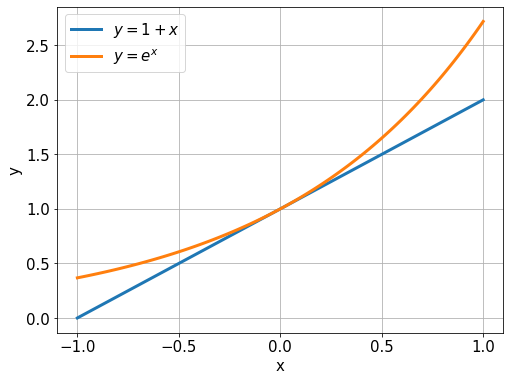

In [39]:
# hide
x = np.linspace(-1,1,100)
plt.figure(figsize=(8,6))
plt.plot(x,1+x,linewidth=3,label="$y=1+x$")
plt.plot(x,np.exp(x),linewidth=3,label="$y=e^x$")
plt.xticks(np.arange(-1,1.1,.5),fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend(fontsize=15)
plt.grid("on")

The t-distribution is a generalization of the Normal Distribution. We can see this by examining $\gap \nu\rightarrow\infty$

$
\gmath
\begin{align}
\lim_{\nu\rightarrow\infty}f(t) 
    &= \lim_{\nu\rightarrow\infty}\frac{\color{red}{\Gamma\left(\frac{\nu + 1}{2}\right)/\Gamma\left(\frac{\nu}{2}\right)}}{\sqrt{\nu \pi} } \left(\color{blue}{1 + \frac{t^2}{\nu}}\right)^{-\frac{\nu + 1}{2}}
= \lim_{\nu\rightarrow\infty}\frac{\color{red}{\sqrt{\nu}/\sqrt{2}}}{\sqrt{\nu}\cdot \sqrt{\pi} } \left(\color{blue}{1 + \frac{t^2}{\nu}}\right)^{-\frac{\nu + 1}{2}}
% \hspace{.5cm}
&\text{using }\color{red}{\Gamma(z) = \int_0^\infty t^{z-1}e^{-t}\,dt}
\\\\
&= \lim_{\nu\rightarrow\infty}\frac{1}{\sqrt{2 \pi} } \left(\color{blue}{e^{t^2/\nu}}\right)^{-\frac{\nu + 1}{2}}
= \lim_{\nu\rightarrow\infty}\frac{1}{\sqrt{2 \pi} } e^{-t^2(\nu+1)/(2\nu)}
% \hspace{.5cm}
&\text{using }\color{blue}{1+x \approx e^x}\text{ for }|x|\approx0
\\\\
&= \frac{1}{\sqrt{2 \pi} } e^{-t^2/2}
\end{align}
$

which is the standard Normal Distribution with $\gap\mu=0,\sigma=1$

Properties of the t-Distribution:
- The t-distribution is symmetric and bell-shaped, similar to the standard normal distribution, but has heavier tails.
- As the degrees of freedom increase, the t-distribution approaches the standard normal distribution.

Below, use the slider to plot the t-distribution while varying the degrees of freedom (df) $\gap\nu$

In [40]:
# hide
import scipy

# Function to update plot
def plotTDist(df,compareNormal=False):
    t = np.linspace(-10, 10, 500)
    y = scipy.stats.t.pdf(t, df)
    plt.figure(figsize=(8, 6))
    plt.fill_between(t, y, label=f't-distribution (df={df})')
    if compareNormal:
        x,y = normal(0,1)
        plt.plot(x,y,'r-',label="standard Normal Dist.",lw=4)
    plt.ylim((0,0.4))
    plt.xlim((-10,10))
    plt.xlabel('t',fontsize=15)
    plt.ylabel('Probability Density',fontsize=15)
    plt.title('Student\'s t-Distribution',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend()
    plt.grid(True)
#     plt.show()

# Slider widgets for degrees of freedom
df_slider = widgets.IntSlider(value=1, min=1, max=30, step=1, description='DoF:')
compareNormal_checkbox = widgets.Checkbox(value=False,description="Plot Normal:")

# Observe changes in sliders and update plot accordingly
# widgets.interactive(plotTDist, df=df_slider,compareNormal=False)
widgets.HBox([
    widgets.VBox([df_slider,compareNormal_checkbox,]),
    widgets.interactive_output(
        plotTDist, {
            "df":df_slider,
            "compareNormal":compareNormal_checkbox,
        }),
])

What's the expected value of the t-distribution?

$
\gmath
E[T] = \int_{-\infty}^\infty t\cdot P(T=t)\,dt
= \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\sqrt{\nu \pi} \, \Gamma\left(\frac{\nu}{2}\right)}\int_{-\infty}^\infty t\cdot \left(1 + \frac{t^2}{\nu}\right)^{-\frac{\nu + 1}{2}}\, dt
$

Now, let $\gap u=t^2,\gap$ then $\gap du=2t\,dt$, giving us

$
\gmath
\frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{2\sqrt{\nu \pi} \, \Gamma\left(\frac{\nu}{2}\right)}\int_{\infty}^\infty\left(1 + \frac{u}{\nu}\right)^{-\frac{\nu + 1}{2}}\, du
$

Note that the limits of the integral need to change as we change variables from $t$ to $u$. With the new limits of integration, it's clear that the answer is $\gap E[T]=0\gap$ because, if $F(u)$ is the antiderivative to the integral, then the solution accounting for integration limits will be $\gap F(\infty)-F(\infty)$

### Real-World Application: Comparing Means

**Motivating Example**: Suppose you are a quality control manager at a factory that produces light bulbs. You are interested in determining whether a new manufacturing process produces bulbs with a different average lifespan compared to the current process. You have a small sample of data:
- Current process: sample mean lifespan = 1000 hours, standard deviation = 30 hours, sample size = 10.
- New process: sample mean lifespan = 1020 hours, standard deviation = 25 hours, sample size = 10.

You want to test whether the new process significantly improves the product's lifespan. Given the small sample size and unknown population standard deviation, the t-distribution is appropriate.



**Setting up the hypothesis test**:
- Null hypothesis $\gap H_0: \gap$ $\gap\mu = 1000 \gap$ hours (the mean lifespan of the bulbs is 1000 hours, as with the current process).
- Alternative hypothesis $\gap H_1: \gap$ $\gap \mu > 1000 \gap$ hours (the new process produces bulbs with a longer lifespan).

**Test statistic**: The test statistic for a one-sample t-test is given by:
$
\gmath
t = \frac{\bar{x} - \mu}{s / \sqrt{n}}
$

where:
- $\gap\bar{x}\gap$ is the sample mean,
- $\gap\mu\gap$ is the population mean under the null hypothesis,
- $\gap s \gap$ is the sample standard deviation,
- $\gap n \gap$ is the sample size.

The numerator is shifting the center of the sample distribution to be zero so that we can compare the sample distribution to the t-distribution.

The denominator is called the **standard error** and estimates the standard deviation of the true underlying process.

test statistic for a one-sample t-test: 
$
\gmath
t = \frac{\bar{x} - \mu}{s / \sqrt{n}}
$

For the new process:
$
\gmath
t = \frac{1020 - 1000}{25 / \sqrt{10}} = \frac{20}{7.91} \approx 2.53
$

With a sample size of $\gap n = 10,\gap$ the degrees of freedom $\gap\nu = n - 1 = 9$

Using a t-table or calculator, find the critical value for a one-tailed test with $\gap \nu = 9 \gap$ degrees of freedom at a significance level $\gap \alpha = 0.05\gap$. The critical t-value is approximately $1.833$

Since $\gap2.53 > 1.833,\gap$ we reject the null hypothesis. This suggests that the new process significantly increases the lifespan of the bulbs.

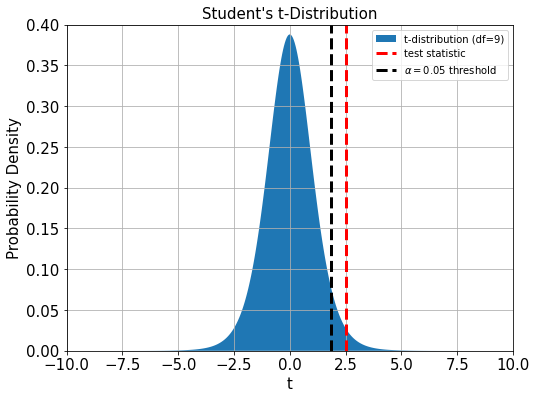

In [41]:
# hide
plotTDist(df=9,compareNormal=False)
y = plt.ylim()
t = (1020-1000)/(25/np.sqrt(10))
plt.plot([t,t],y,'r--',lw=3,label="test statistic")
plt.plot([1.833,1.833],y,'k--',lw=3,label="$\\alpha=0.05$ threshold")
plt.ylim(y)
plt.legend();

In [86]:
# Let's try this programmatically
import scipy
# create synthetic data for old process
oldProcess_data = np.random.normal(1000, 30, 10)
newProcess_data = np.random.normal(1020, 25, 10)

print("Old Process mean: %0.2f and standard deviation: %0.2f" % (np.mean(oldProcess_data),np.std(oldProcess_data)))
print("New Process mean: %0.2f and standard deviation: %0.2f" % (np.mean(newProcess_data),np.std(newProcess_data)))

# use the t-test statistic to see if the average of the old process is statistically 
# significantly greater than the average of the old process.
scipy.stats.ttest_ind(newProcess_data,oldProcess_data,alternative="greater")

Old Process mean: 1010.94 and standard deviation: 22.81
New Process mean: 1018.98 and standard deviation: 21.38


Ttest_indResult(statistic=0.7714132656059083, pvalue=0.22523545992560268)

# Hypothesis Testing

Hypothesis testing is a critical aspect of statistical analysis, allowing us to make decisions based on data. It involves formulating hypotheses, conducting tests, and interpreting the results. The process provides a framework for making inferences about populations based on sample data. We've seen some examples of hypothesis testing already in this module.

First, you define your hypotheses. As part of this, you need to pick which probability distribution most closely describes the process that generates the data:
- **Null Hypothesis ($H_0$)**: A statement that there is no effect or no difference. It serves as the default assumption.
- **Alternative Hypothesis ($H_1$)**: A statement that there is an effect or a difference. It is what you aim to support.

Second, you analyze your data and test if the resulting data (e.g., the sample mean) is suprising given the null hypothesis:
- A test statistic is a standardized value calculated from sample data. It is used to decide whether to reject the null hypothesis.
- Examples: 
  - $t$-statistic for t-tests.
  - $z$-statistic for z-tests.


Third, you define the threshold for "surprising." That is, how rare should the empirical outcome be given the null hypothesis for us to conclude that the null hypothesis is <u>wrong</u>:
- The probability of rejecting the null hypothesis when it is actually true (Type I error)
- Common choices: $\alpha = 0.05, \alpha = 0.01$
- The **p-value** is the probability of obtaining a test statistic at least as extreme as the one observed, given the null hypothesis.
- If the p-value$<\alpha,$ reject the null hypothesis.


In [87]:
# carBatteryData = np.random.normal(98,2,10)
# carBatteryData.tofile("./carBatteryData.csv")
carBatteryData = np.fromfile("./carBatteryData.csv")

**Scenario**: A company claims that their battery life is 100 hours on average. You collect a sample of 10 batteries.

In [89]:
np.mean(carBatteryData),np.std(carBatteryData),len(carBatteryData)

(97.77902805859637, 1.790860110627259, 10)

Batteries in your sample have an average lifespan of only 97 hours. Is this significantly lower than the lifespan reported by the company?

We have a small sample of 10 for which we know the sample's mean and standard deviation.

Our Null Hypothesis ($H_0$) is that car batteries indeed have an average lifespan of 100 hours, as reported by the company.

The alternative Hypothesis ($H_1$) is that the company is misrepresnting their batteries' lifespan.

The one-sided t-test is appropriate to see if the sample outcome is suprisingly low compared to the reported mean. Let's use $\gap\alpha=0.05$

In [90]:
scipy.stats.ttest_1samp(carBatteryData,100,alternative="less")

TtestResult(statistic=-3.7205116048272324, pvalue=0.002383426395158007, df=9)

The p-value of $0.00238<0.05,\gap$ so we reject the Null Hypothesis.

**Scenario**: A call center receives an average of 2 calls per minute. In one minute, the center receives 5 calls. Has the average call rate increased?

The Null Hypothesis ($H_0$) is that the average call rate is 2 calls per minute.

The Alternative Hypothesis ($H_1$) is that the average call rate is not 2 calls per minute.

Let's use the threshold $\gap\alpha=0.05$

Use the Poisson distribution and find the p-value for receiving 5 or more calls:

$
\gmath
P(X \geq 5) = 1 - P(X < 5) = 1 - \left( P(X = 0) + P(X = 1) + P(X = 2) + P(X = 3) + P(X = 4) \right)
$

Where:
$
\gmath
P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}
$

with $\gap\lambda=2$

Using the formula, we have:

$
\gmath
P(X < 5) \approx 0.1353 + 0.2707 + 0.2707 + 0.1804 + 0.0902 = 0.9473
$

$
\gmath
\Rightarrow\gap
P(X \geq 5) = 1-0.9473 = 0.0527
$

The p-value of $0.0525 \not<0.05,$ so we fail to reject the Null Hypothesis.

Note the language here. We are not concluding that the Null Hypothesis is correct. We are just saying that we cannot rule it out.